In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("diamonds_new.csv")
df.head(19)

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
5,0.24,Very Good,J,VVS2,57.0,3.94,3.96,2.48,168.0
6,0.24,Very Good,I,VVS1,57.0,3.95,3.98,2.47,168.0
7,0.26,Very Good,H,SI1,55.0,4.07,4.11,2.53,168.5
8,0.22,Fair,E,VS2,61.0,3.87,3.78,2.49,168.5
9,0.23,Very Good,H,VS1,61.0,4.00,4.05,2.39,169.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [48]:
df.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

<Axes: >

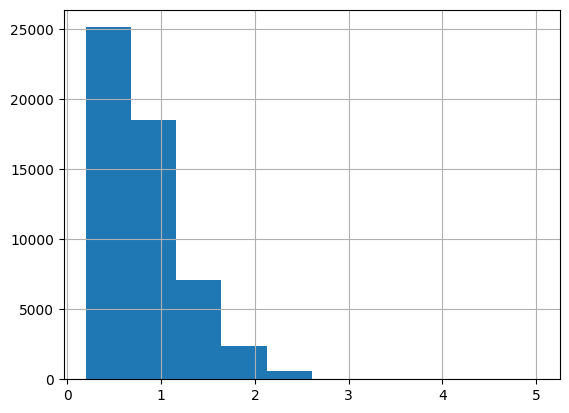

In [49]:
df['carat'].hist()

<Axes: >

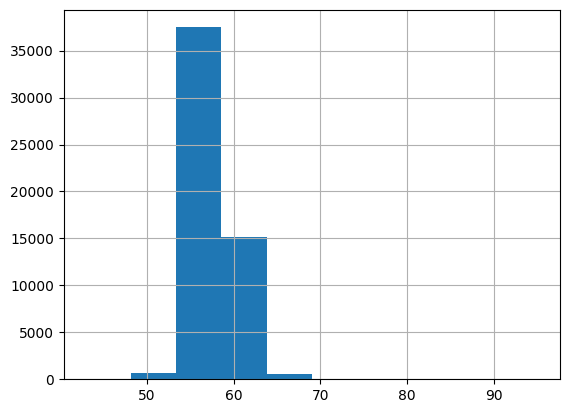

In [50]:
df['table'].hist()

In [51]:
df.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [52]:
df[(df['x']==0) | (df['y']==0) | (df['z']==0)].index

Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [53]:
df2 = df.drop([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557])

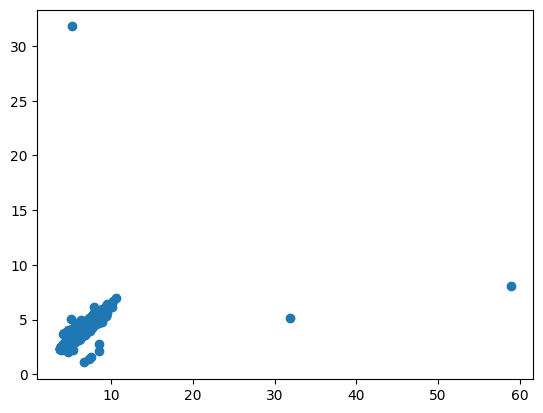

In [54]:
plt.scatter(df2['y'], df2['z'])
plt.show()

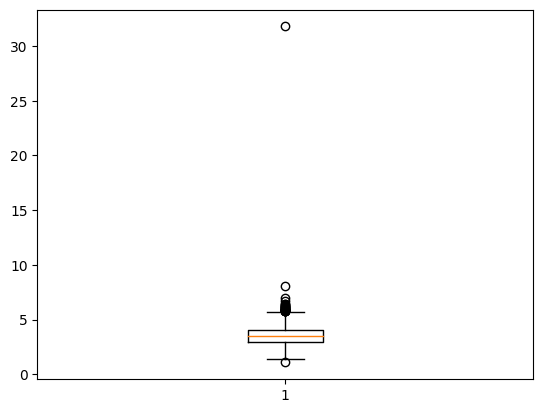

In [55]:
plt.boxplot(df2['z'])
plt.show()

In [56]:
df2[(df2['y'] > 15) | (df2['z'] > 15)].index

Index([24067, 48410, 49189], dtype='int64')

In [57]:
df3 = df2.drop([24067, 48410, 49189])

In [58]:
df3.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [59]:
df3['carat'].fillna(df3['carat'].median(), inplace=True)
df3['table'].fillna(df3['table'].median(), inplace=True)
df3['color'].fillna("G", inplace=True)

In [60]:
df3.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [61]:
df3.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [62]:
y = df3['price_new']
x = df3.drop("price_new", axis=1)

In [63]:
x = pd.get_dummies(x)

In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [65]:
mn = MinMaxScaler()
x = mn.fit_transform(x)

In [66]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state= 134)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [68]:
x.shape

(53929, 25)

In [70]:
### input = 25, hidden1 = 32, hidden2 = 16, hidden3 = 8, output = 1

In [71]:
model1 = Sequential()
model1.add(Dense(32, activation = "relu", input_shape = (25,)))
model1.add(Dense(16, activation = "relu"))
model1.add(Dense(8, activation = "relu"))
model1.add(Dense(1, activation = None))
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                832       
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [72]:
model1.compile(optimizer = "sgd", loss = "mean_squared_error", metrics = ["mean_squared_error"])

In [73]:
model1.fit(x_train, y_train, epochs = 10, batch_size = 128)

Epoch 1/10
338/338 [==============================] - 1s 2ms/step - loss: 1406556309285009138647040.0000 - mean_squared_error: 1406556309285009138647040.0000
Epoch 2/10
338/338 [==============================] - 0s 1ms/step - loss: 18260890977566720.0000 - mean_squared_error: 18260890977566720.0000
Epoch 3/10
338/338 [==============================] - 0s 1ms/step - loss: 21400383488.0000 - mean_squared_error: 21400383488.0000
Epoch 4/10
338/338 [==============================] - 0s 1ms/step - loss: 4023167.2500 - mean_squared_error: 4023167.2500
Epoch 5/10
338/338 [==============================] - 0s 1ms/step - loss: 3998242.5000 - mean_squared_error: 3998242.5000
Epoch 6/10
338/338 [==============================] - 0s 1ms/step - loss: 3998219.7500 - mean_squared_error: 3998219.7500
Epoch 7/10
338/338 [==============================] - 0s 1ms/step - loss: 3997850.5000 - mean_squared_error: 3997850.5000
Epoch 8/10
338/338 [==============================] - 0s 1ms/step - loss: 3998243.

In [74]:
model1.evaluate(x_test, y_test)

338/338 [==============================] - 1s 1ms/step - loss: 3895393.2500 - mean_squared_error: 3895393.2500


[3895393.25, 3895393.25]

model2 

In [76]:
model2 = Sequential()
model2.add(Dense(64, input_shape = (25,), activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(1, activation = None))

In [77]:
model2.compile(optimizer = "sgd", loss = "mean_squared_error", metrics = ["mean_squared_error"])
model2.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
338/338 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 2/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 3/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 4/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 5/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 6/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 7/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 8/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 9/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 10/30
338/338 [==============================] - 1s 2ms/st

Model 3

In [78]:
model3 = Sequential()
model3.add(Dense(128, input_shape = (25,), activation = "relu"))
model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(64, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(64, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(32, activation = "relu"))
model3.add(Dense(16, activation = "relu"))
model3.add(Dense(1, activation = None))

In [79]:
model3.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mean_squared_error"])
model3.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
338/338 [==============================] - 3s 5ms/step - loss: 2536666.0000 - mean_squared_error: 2536666.0000
Epoch 2/30
338/338 [==============================] - 1s 3ms/step - loss: 227813.1719 - mean_squared_error: 227813.1719
Epoch 3/30
338/338 [==============================] - 1s 3ms/step - loss: 208016.6719 - mean_squared_error: 208016.6719
Epoch 4/30
338/338 [==============================] - 1s 3ms/step - loss: 196001.7188 - mean_squared_error: 196001.7188
Epoch 5/30
338/338 [==============================] - 1s 3ms/step - loss: 190584.9062 - mean_squared_error: 190584.9062
Epoch 6/30
338/338 [==============================] - 1s 3ms/step - loss: 189123.5312 - mean_squared_error: 189123.5312
Epoch 7/30
338/338 [==============================] - 1s 3ms/step - loss: 190394.3125 - mean_squared_error: 190394.3125
Epoch 8/30
338/338 [==============================] - 1s 4ms/step - loss: 180359.5625 - mean_squared_error: 180359.5625
Epoch 9/30
338/338 [==================

In [80]:
model3.evaluate(x_test, y_test)

338/338 [==============================] - 1s 1ms/step - loss: 180751.6875 - mean_squared_error: 180751.6875


[180751.6875, 180751.6875]

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [85]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [86]:
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred)

310612.43175525905

# Assignment Begins

In [87]:
df4 = df3.copy()

Label Encoding features based on their quality

In [88]:
cut_worst_to_best = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_worst_to_best = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
color_worst_to_best = ['J','I','H','G','F','E','D']

In [89]:
def manual_label_encode(x, list_):
    if x in list_:
        return list_.index(x)

In [90]:
df4['cut'] = df4['cut'].apply(lambda x: manual_label_encode(x, cut_worst_to_best))
df4['clarity'] = df4['clarity'].apply(lambda x: manual_label_encode(x, clarity_worst_to_best))
df4['color'] = df4['color'].apply(lambda x: manual_label_encode(x, color_worst_to_best))

In [91]:
df4

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,4,5,1,55.0,3.95,3.98,2.43,163.0
1,0.21,3,5,2,61.0,3.89,3.84,2.31,163.0
2,0.23,1,5,4,65.0,4.05,4.07,2.31,163.5
3,0.29,3,1,3,58.0,4.20,4.23,2.63,167.0
4,0.31,1,0,1,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,57.0,5.75,5.76,3.50,1378.5
53936,0.72,1,6,2,55.0,5.69,5.75,3.61,1378.5
53937,0.70,2,6,2,60.0,5.66,5.68,3.56,1378.5
53938,0.86,3,2,1,58.0,6.15,6.12,3.74,1378.5


In [92]:
df4.corr()

,carat,cut,color,clarity,table,x,y,z,price_new
carat,1.000000,-0.135033,-0.291413,-0.352836,0.181658,0.977764,0.976844,0.976031,0.921604
cut,-0.135033,1.000000,0.020516,0.189196,-0.433310,-0.126281,-0.125909,-0.152495,-0.053567
color,-0.291413,0.020516,1.000000,-0.025718,-0.026475,-0.270748,-0.270555,-0.274892,-0.172532
clarity,-0.352836,0.189196,-0.025718,1.000000,-0.160388,-0.372973,-0.367635,-0.376446,-0.146838
table,0.181658,-0.433310,-0.026475,-0.160388,1.000000,0.196129,0.189976,0.155850,0.127161
x,0.977764,-0.126281,-0.270748,-0.372973,0.196129,1.000000,0.998658,0.990758,0.887216
y,0.976844,-0.125909,-0.270555,-0.367635,0.189976,0.998658,1.000000,0.990420,0.888812
z,0.976031,-0.152495,-0.274892,-0.376446,0.155850,0.990758,0.990420,1.000000,0.881725
price_new,0.921604,-0.053567,-0.172532,-0.146838,0.127161,0.887216,0.888812,0.881725,1.000000


creating new training and testing sets

In [93]:
y = df4['price_new']
x = df4.drop("price_new", axis=1)

minmax = MinMaxScaler(feature_range=(0,1))
x = minmax.fit_transform(x)
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state= 123)

In [110]:
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [95]:
model4 = Sequential()
model4.add(Dense(128, input_shape = (8,), activation = "relu", kernel_regularizer=l2(0.02)))
model4.add(Dense(128, activation = "relu", kernel_regularizer=l2(0.02)))
model4.add(Dropout(0.2))
model4.add(Dense(64, activation = "relu", kernel_regularizer=l2(0.02)))
model4.add(Dense(64, activation = "relu", kernel_regularizer=l2(0.02)))
model4.add(Dropout(0.15))
model4.add(Dense(32, activation = "relu", kernel_regularizer=l2(0.02)))
model4.add(Dropout(0.1))
model4.add(Dense(16, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.1))
model4.add(Dense(8, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dense(1, activation = 'linear'))
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               1152      
                                                                 
 dense_45 (Dense)            (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dense_47 (Dense)            (None, 64)                4160      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_48 (Dense)            (None, 32)               

In [96]:
model4.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mean_squared_error"])
model4.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_mean_squared_error', patience=10, restore_best_weights=True)])

Epoch 1/50
338/338 [==============================] - 3s 5ms/step - loss: 2158404.0000 - mean_squared_error: 2158395.7500 - val_loss: 261434.3906 - val_mean_squared_error: 261424.9844
Epoch 2/50
338/338 [==============================] - 1s 3ms/step - loss: 364880.5625 - mean_squared_error: 364870.9688 - val_loss: 210681.0625 - val_mean_squared_error: 210670.9844
Epoch 3/50
338/338 [==============================] - 1s 3ms/step - loss: 315590.0312 - mean_squared_error: 315579.4688 - val_loss: 166737.7969 - val_mean_squared_error: 166726.8906
Epoch 4/50
338/338 [==============================] - 1s 3ms/step - loss: 289890.2812 - mean_squared_error: 289878.9062 - val_loss: 205623.7500 - val_mean_squared_error: 205611.8125
Epoch 5/50
338/338 [==============================] - 1s 3ms/step - loss: 263969.6875 - mean_squared_error: 263957.2500 - val_loss: 167066.2812 - val_mean_squared_error: 167053.5469
Epoch 6/50
338/338 [==============================] - 1s 3ms/step - loss: 246183.9531 - 

Model Evaluation

In [97]:
pred = model4.predict(x_test)
model4.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 114327.8047 - mean_squared_error: 114313.1250


[114327.8046875, 114313.125]

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [99]:
print("Mean Squared error is :", round(mean_squared_error(y_test, pred),2))
print("Mean Absolute error is :", round(mean_absolute_error(y_test, pred),2))

Mean Squared error is : 114313.12
Mean Absolute error is : 188.22


In [107]:
model5 = Sequential()
model5.add(Dense(128, input_shape = (8,), activation = "relu", kernel_regularizer=l1_l2(0.05)))
model5.add(Dense(128, activation = "relu", kernel_regularizer=l1_l2(0.04)))
model5.add(Dropout(0.1))
model5.add(Dense(64, activation = "relu", kernel_regularizer=l1_l2(0.04)))
model5.add(Dropout(0.1))
model5.add(Dense(32, activation = "relu", kernel_regularizer=l1_l2(0.04)))
model5.add(Dense(16, activation = "relu", kernel_regularizer=l1_l2(0.02)))
model5.add(Dropout(0.05))
model5.add(Dense(8, activation = "relu", kernel_regularizer=l1_l2(0.02)))
model5.add(Dense(1, activation = 'linear'))
model5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 128)               1152      
                                                                 
 dense_68 (Dense)            (None, 128)               16512     
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_69 (Dense)            (None, 64)                8256      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_70 (Dense)            (None, 32)                2080      
                                                                 
 dense_71 (Dense)            (None, 16)              

In [108]:
model5.compile(optimizer = RMSprop(learning_rate=0.01), loss = "mean_squared_error", metrics = ["mean_squared_error"])
model5.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_mean_squared_error', patience=12, restore_best_weights=True)])

Epoch 1/50
338/338 [==============================] - 2s 4ms/step - loss: 1067213.6250 - mean_squared_error: 1067118.1250 - val_loss: 841478.4375 - val_mean_squared_error: 841373.6250
Epoch 2/50
338/338 [==============================] - 1s 3ms/step - loss: 539767.9375 - mean_squared_error: 539654.6875 - val_loss: 275639.8438 - val_mean_squared_error: 275521.7500
Epoch 3/50
338/338 [==============================] - 1s 3ms/step - loss: 457866.7812 - mean_squared_error: 457739.8438 - val_loss: 2262308.5000 - val_mean_squared_error: 2262171.0000
Epoch 4/50
338/338 [==============================] - 1s 3ms/step - loss: 389034.4375 - mean_squared_error: 388896.5000 - val_loss: 825687.6875 - val_mean_squared_error: 825549.6250
Epoch 5/50
338/338 [==============================] - 1s 3ms/step - loss: 356404.9062 - mean_squared_error: 356263.6875 - val_loss: 540858.5625 - val_mean_squared_error: 540715.7500
Epoch 6/50
338/338 [==============================] - 1s 3ms/step - loss: 317830.2500 

In [113]:
pred = model5.predict(x_test)
model5.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 92278.3125 - mean_squared_error: 92132.4062


[92278.3125, 92132.40625]

In [114]:
print("Mean Squared error is :", round(mean_squared_error(y_test, pred),2))
print("Mean Absolute error is :", round(mean_absolute_error(y_test, pred),2))

Mean Squared error is : 92132.42
Mean Absolute error is : 167.6
